<a href="https://colab.research.google.com/github/jmins33/Seaborn/blob/master/seaborn_tutorial/Seaborn_tutorial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing the distribution of a dataset
- This chapter of the tutorial will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distributions. 
- You may also want to look at the categorical plots chapter for examples of functions that make it easy to compare the distribution of a variable across levels of other variables.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sns.set(color_codes=True)

# Plotting univariate distributions
- The most convenient way to take a quick look at a univariate distribution in seaborn is the ***distplot()*** function. By default, this will draw a **histogram** and fit a **kernel density estimate (KDE)**.

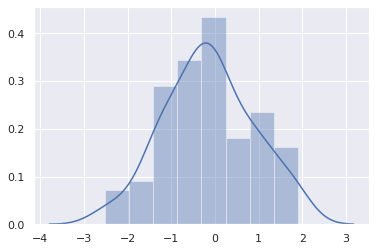

In [3]:
x = np.random.normal(size=100)
sns.distplot(x)

## Histograms
- 히스토그램은 데이터 범위를 따라 빈을 형성한 다음 각 빈에 포함되는 관측치의 수를 표시하기 위해 막대를 그려 데이터 분포를 나타낸다.
- You can make the rug plot itself with the rugplot() function, but it is also available in distplot()

- bins : argument for matplotlib hist(), or None, optional
 + Specification of hist bins. If unspecified, as reference rule is used that tries to find a useful default.  
- kde : bool, optional
 + Whether to plot a gaussian kernel density estimate.  
- rug : bool, optional
 + Whether to draw a rugplot on the support axis.  

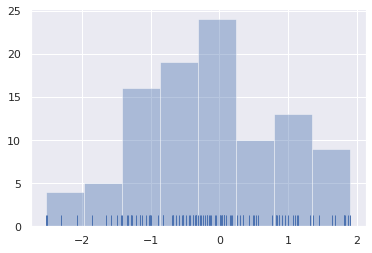

In [9]:
sns.distplot(x, kde=False, rug=True)
# kde는 그래프 위에 그려지는 선을 의미함.

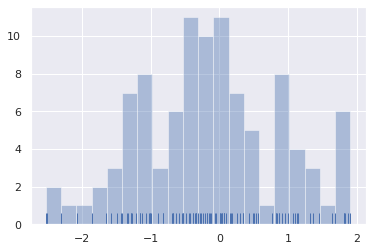

In [5]:
sns.distplot(x, bins=20, kde=False, rug=True)
# bins는 막대 개수.

## Kernel density estimation
- The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. 
- Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis.

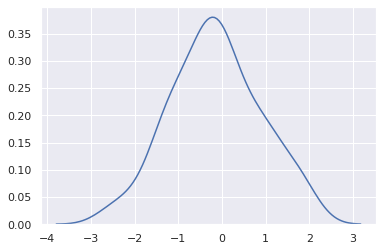

In [11]:
sns.distplot(x, hist=False)
# hist를 true로 하면 막대와 rug도 포함한 그래프가 나옴.

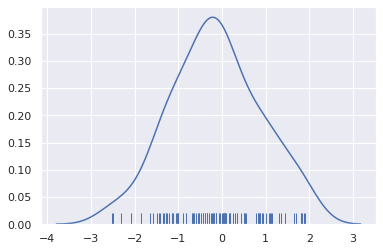

In [7]:
sns.distplot(x, hist=False, rug=True)
# rug는 밑에 바코드 같은 걸 의미.

- KDE 그리기는 히스토그램을 그리는 것보다 계산적으로 더 많이 관련되어 있다. 각 관측치는 먼저 그 값을 중심으로 한 정규(가우스) 곡선으로 대체된다.

In [12]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

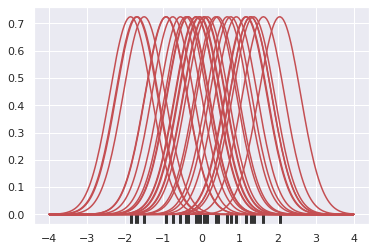

In [15]:
kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")
    # 빨간색 그래프

sns.rugplot(x, color=".2", linewidth=3)
# 바코드

- Next, these curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under ***it is equal to 1.***

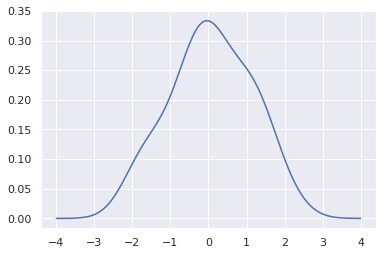

In [16]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density)

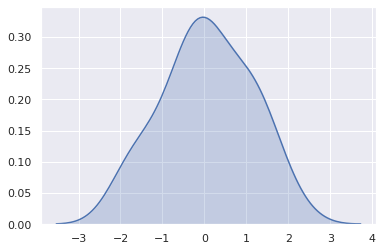

In [17]:
sns.kdeplot(x, shade=True)

- We can see that if we use the kdeplot() function in seaborn, we get the same curve.
- This function is used by distplot(), but it provides a more direct interface with easier access to other options when you just want the density estimate.

- The bandwidth (bw) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above.

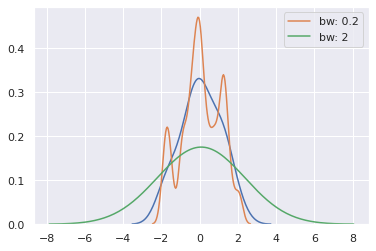

In [18]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2") # 숫자가 클 수록 완만함.
plt.legend()

- It’s possible to control how far past the extreme values the curve is drawn with the cut parameter; however, **this only influences how the curve is drawn and not how it is fit.**

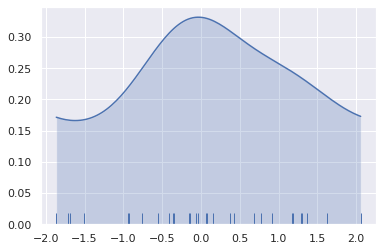

In [19]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x)

- Fitting parametric distributions
 + You can also use distplot() to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data.

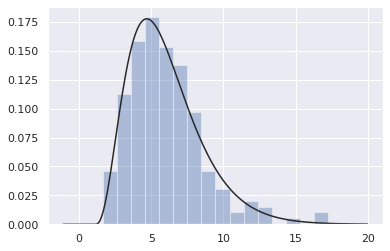

In [20]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)

# Plotting bivariate distributions
- It can also be useful to visualize a bivariate distribution of two variables.
- The easiest way to do this in seaborn is to just use the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.


In [21]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

## Scatterplots
- The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values.
- scatterplot(), jointplot() 으로 scatterplot 그릴 수 있음

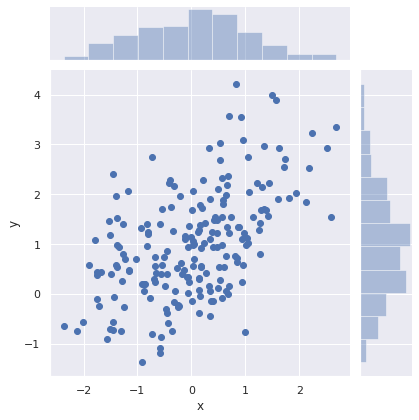

In [22]:
sns.jointplot(x="x", y="y", data=df)

## Hexbin plots
- A bivariate analogue of a histogram is known as a “hexbin” plot.
- This plot works best with relatively large datasets.
- It’s **available through in matplotlib** as matplotlib.axes.Axes.hexbin() and as a style in jointplot(). 
- It looks best with a **white** background.

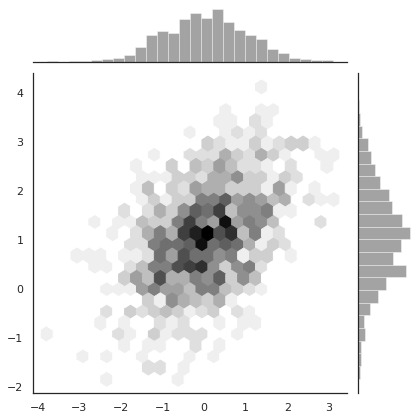

In [27]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")

## Kernel density estimation
- It is also possible to use the kernel density estimation procedure described above to visualize a bivariate distribution.
- This kind of plot is shown with a **contour plot** and is available as a style in **jointplot().**

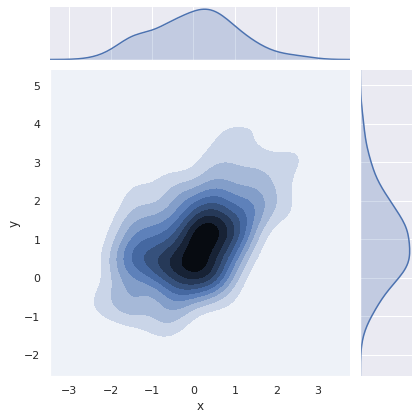

In [29]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

- kdeplot() 함수를 사용하여 2차원 커널 밀도 그림을 그릴 수도 있다. 

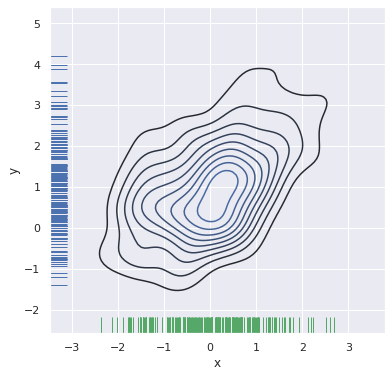

In [30]:
f, ax = plt.subplots(figsize=(6, 6))

# ked
sns.kdeplot(df.x, df.y, ax=ax)

# 바코드
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax)

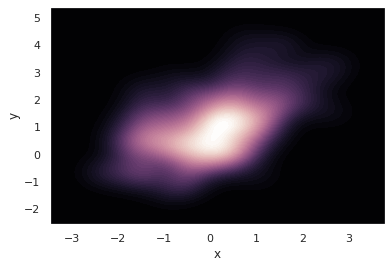

In [31]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True)

-  jointplot() 함수는 JointGrid를 사용하여 수치를 관리한다. 
- 더 많은 유연성을 위해 JointGrid를 직접 사용하여 그림을 그릴 수 있다.

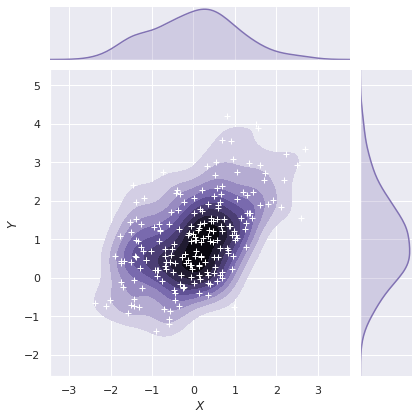

In [32]:
# kde
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
# scatter
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")

g.ax_joint.collections[0].set_alpha(0)
# label
g.set_axis_labels("$X$", "$Y$")

# Visualizing pairwise relationships in a dataset
- you can use the pairplot() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame.


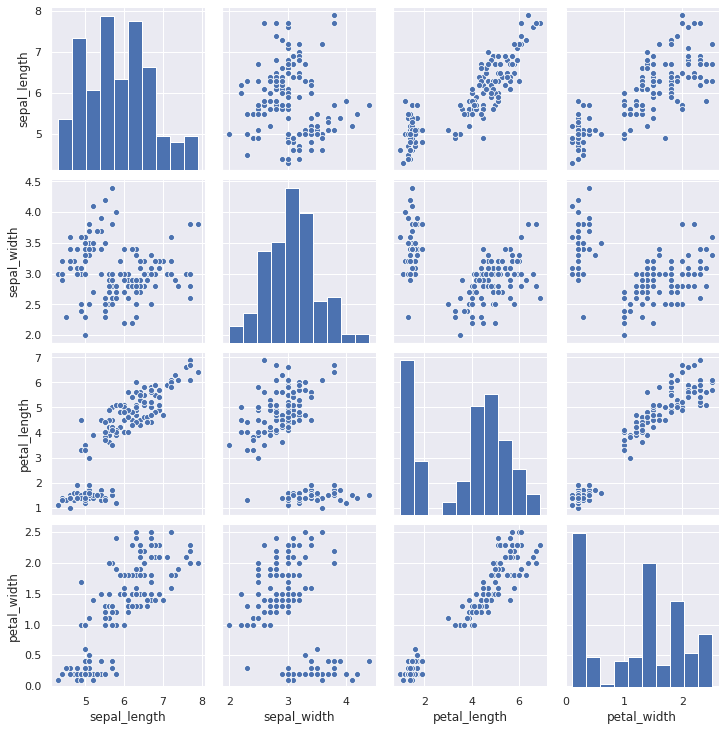

In [33]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

- Specifying the hue parameter automatically changes the histograms to KDE plots to facilitate comparisons between multiple distributions.

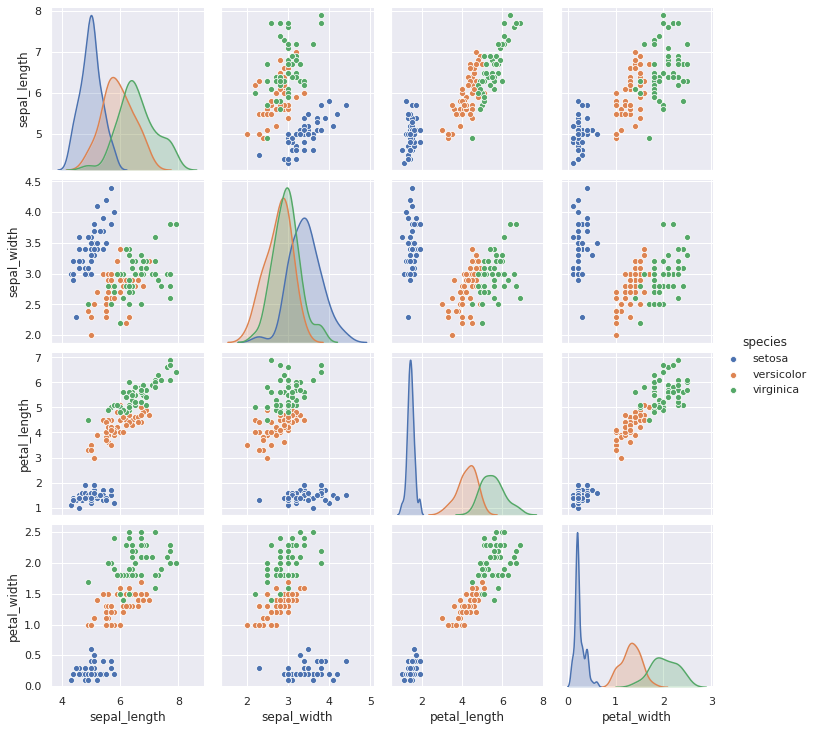

In [34]:
sns.pairplot(iris, hue="species")

-  jointplot()과 JointGrid의 관계와 매우 유사하게 pairplot() 함수는 PairGrid 객체 위에 구축되며, 이를 통해 보다 유연하게 직접 사용할 수 있다.

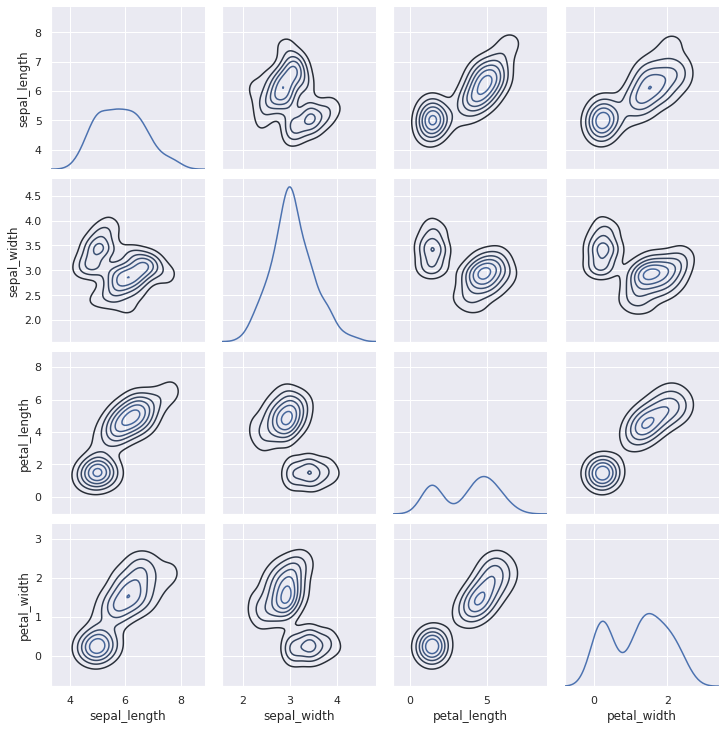

In [35]:
g = sns.PairGrid(iris)

# Plot with a univariate function on each diagonal subplot.
g.map_diag(sns.kdeplot)
# Plot with a bivariate function on the off-diagonal subplots.
g.map_offdiag(sns.kdeplot, n_levels=6)